<a href="https://colab.research.google.com/github/shivanshr58/Web-Scraping-Mini-Project/blob/main/web_scraping_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this project, I will scrape data for second-hand cars for sale in Meerut on Olx. I will utilize the requests library to fetch the HTML and then parse it using Beautiful Soup. Following that, I will clean the data by fixing the data types, making it ready for analysis. Finally, I will create some visuals to understand the data more effectively.

# Data Scraping

In [1]:
# importing necessary libraries

import urllib.request as urllib
from bs4 import BeautifulSoup
import re

In [ ]:
# extracting loading html into beautiful soup

scraped = []
url = "https://www.olx.in/en-in/meerut_g4059314/cars_c84"
html = urllib.urlopen(url)
soup = BeautifulSoup(html)
soup.prettify()

Extracting columns and storing in a list


In [3]:
title = []
for item in soup.find_all("div",class_ = "_2Gr10"):
  title.append(item.string)

In [4]:
price = []
for item in soup.find_all("span",class_ = "_1zgtX"):
  price.append(item.string)

In [5]:
model_km = []
for item in soup.find_all("div",class_ = "_21gnE"):
  model_km.append(item.string)

In [6]:
location = []
for item in soup.find_all("div",class_ = "_3VRSm"):
  location.append(item.text)

In [7]:
import pandas as pd
df = pd.DataFrame({"title":title,"model_km":model_km,"price":price})

In [8]:
df.head()

,title,model_km,price
0,Hyundai i10,2013 - 62000.0 km,"₹ 1,90,000"
1,Honda City,"2015 - 72,000 km","₹ 4,35,000"
2,Maruti Suzuki Swift,2018 - 61000.0 km,"₹ 5,25,000"
3,Maruti Suzuki Wagon-R-1-0,"2013 - 50,000 km","₹ 3,00,000"
4,Maruti Suzuki Wagon-R,"2016 - 52,000 km","₹ 2,80,000"


# Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     40 non-null     object
 1   model_km  40 non-null     object
 2   price     40 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [10]:
# the model_km column has year and distance separated by "-" so splitting the column

df[["year_model","distance"]] = df["model_km"].str.split("-",expand = True)
df = df.drop(columns = "model_km")

In [11]:
# transforming price and distance to convert to numerical

df["price"] = df["price"].apply(lambda x: x.replace(",","")[2:])
df["distance"] = df["distance"].apply(lambda x: re.search("\d+",x.replace(",","")).group(0))

In [12]:
# changing type to int for every column except title

for i in df.columns[1:]:
  df[i] = df[i].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       40 non-null     object
 1   price       40 non-null     int64 
 2   year_model  40 non-null     int64 
 3   distance    40 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ KB


In [14]:
df.head()

,title,price,year_model,distance
0,Hyundai i10,190000,2013,62000
1,Honda City,435000,2015,72000
2,Maruti Suzuki Swift,525000,2018,61000
3,Maruti Suzuki Wagon-R-1-0,300000,2013,50000
4,Maruti Suzuki Wagon-R,280000,2016,52000


Scraped data is now ready for Analysis

# Visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

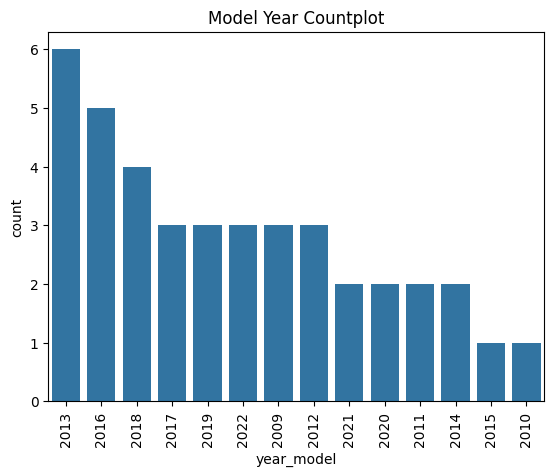

In [16]:
sns.countplot(x="year_model",data = df,order=df['year_model'].value_counts().index)
plt.title("Model Year Countplot")
plt.xticks(rotation = 90)
plt.show()

In [17]:
# addind age as a new column

df["age"] = 2024 - df["year_model"]

In [18]:
df.head()

,title,price,year_model,distance,age
0,Hyundai i10,190000,2013,62000,11
1,Honda City,435000,2015,72000,9
2,Maruti Suzuki Swift,525000,2018,61000,6
3,Maruti Suzuki Wagon-R-1-0,300000,2013,50000,11
4,Maruti Suzuki Wagon-R,280000,2016,52000,8


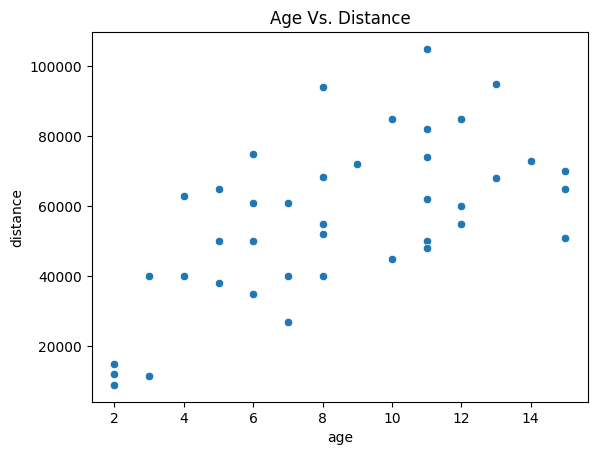

In [19]:
sns.scatterplot(x="age",y="distance",data=df)
plt.title("Age Vs. Distance")
plt.show()

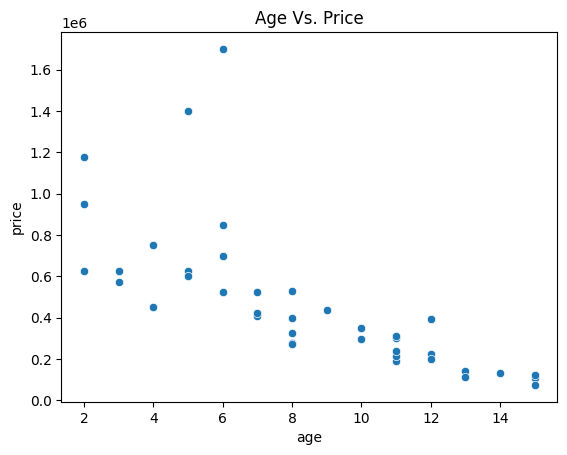

In [20]:
sns.scatterplot(x="age",y="price",data=df)
plt.title("Age Vs. Price")
plt.show()